In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
from dask_gateway import Gateway
from dask.distributed import Client
gateway = Gateway()
cluster = gateway.new_cluster()
cluster.adapt()
client = Client(cluster)
cluster

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import gcsfs # Pythonic file-system for Google Cloud Storage
import os.path 
import xesmf as xe
from scipy.signal import detrend

In [4]:
%matplotlib inline

# global vars for time-series

Time_months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec');
# plt.rcParams['figure.figsize'] = 12, 6
# %config InlineBackend.figure_format = 'retina'  #enabling 2x PNG matplotlib plots in the IPython notebook
colors = [[255, 255, 38], [255, 255, 38], [255,209, 35],
          [255, 157, 9], [255, 2, 2], [255, 148, 255],
          [255, 6, 255], [127, 245, 206], [26, 136, 255],
          [26, 136, 255], [17, 137, 17], [17, 137, 17],
          [8, 8, 126], [130, 55, 6], [112, 48, 160],
          [92, 92, 255], [92, 92, 255], [4, 2, 0]]
newcolors = []
for color in colors:
    newcolors.append([x/255.0 for x in color])
Colors=newcolors



var_names=['phyc','chl','phydiat','zooc','intpp','epc100',
           'fgco2','spco2','dfe','no3','si','rsntds']


plot_titles=['Biomass (mol/m3)','Chlorophyll (kg/m3)','Diatom (mol/m3)', 
             'Zooplankton (mol/m3)','Primary Production (mol/m2/s)','Export Production at 100m (mol/m2/s)',
             'Air-sea CO2 flux (donward +) (gram C /m2/year)','SpCO2 (ppm)', 'Iron - Fe (mol/m3)', 
             'Nitrate - NO3 (mol/m3)','Silica - Si (mol/m3)', 'Light - Surface Downward SW Radiation (W/m2)']

In [5]:
def get_data(df, var, model, expe, freq):
    try:
        uri = df[(df.variable_id == var) & \
                 (df.source_id == model) & \
                 (df.experiment_id == expe) & \
                 (df.table_id == freq)].zstore.values[0]
        gcs = gcsfs.GCSFileSystem(token='anon')
        ds = xr.open_zarr(gcs.get_mapper(uri), consolidated=True)
#         print(model, var, "found data")
    except:
        ds = []
        #print(model, var, "no data")
    return ds        

In [6]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
# models = ['CESM2', 'GFDL-CM4', 'GFDL-ESM4', 'CESM2-WACCM', 'IPSL-CM6A-LR', 'MRI-ESM2-0',
#           'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'UKESM1-0-LL',  'CanESM5', 'NorESM2-LM', 
#           'MPI-ESM1-2-HR', 'NorCPM1', 'MIROC-ES2L', 'CNRM-ESM2-1']
# models with ssp585 experiment

models = ['CESM2-WACCM','CESM2','GFDL-CM4','GFDL-ESM4','IPSL-CM6A-LR','GISS-E2-1-G','GISS-E2-1-G-CC','MIROC-ES2L',
          'NorCPM1', 'NorESM2-LM','MPI-ESM1-2-HR','MPI-ESM1-2-LR','UKESM1-0-LL','CNRM-ESM2-1','ACCESS-ESM1-5','CanESM5-CanOE','CanESM5', 
          'EC-Earth3']

# expe = 'ssp585'
# freq = 'Omon'
# start_year = '2081'
# end_year = '2100'
# var = 'chl'
# var2 = var+'os'

# xrays = []
# new_models = []

# for model in models:
#     print(model)
#     xray = get_data(df, var2, model, expe, freq)
#     xray1 = get_data(df, var, model, expe, freq) # no os
    
#     # if xray is not empty
#     if isinstance(xray, xr.Dataset): 
#         xrays.append(xray)  
#         new_models.append(model)
#     elif  isinstance(xray1, xr.Dataset): 
#         xrays.append(xray)  
#         new_models.append(model)
        
        
# xray_dic = {key:value for key, value in zip(new_models, xrays)}
# print(len(new_models))

In [7]:
# Another method for out grid:
ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 91, 1.0)),
                     'lon': (['lon'], np.arange(0, 361, 1.0)),
                    }
                   )
ds_out

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 361)
Coordinates:
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0 360.0
Data variables:
    *empty*

In [8]:
# models = ['CESM2-WACCM','CESM2','GFDL-CM4','GFDL-ESM4','IPSL-CM6A-LR', 
#           'MRI-ESM2-0', 'UKESM1-0-LL','CanESM5-CanOE','CanESM5', 
#           'NorESM2-LM', 'NorESM2-MM','MPI-ESM1-2-HR','MPI-ESM1-2-LR',
#           'CNRM-ESM2-1', 'ACCESS-ESM1-5','MIROC-ES2L']


# var_names=['phyc','chl','phydiat','zooc','tos']
# var_names = ['phyc', 'chl', 'phydiat', 'zooc','intpp','epc100','fgco2','spco2','dfe','no3','si','tos','omldamax','hfds','rsntds']
#var_names = ['phyc','chl','phydiat','zooc','intpp','epc100','fgco2','spco2','dfe','no3','si','rsntds']

var_names = ['zooc','phyc']

expe = 'historical'
freq = 'Omon'
start_year = '1995'
end_year = '2014'
diff = 20

#new_models = ['GISS-E2-1-G', 'GISS-E2-1-G-CC']
# new_vars = ['phydiat']   # new models aren't working here. 
xxray_in = []
# true_var = 'phydiat'
for model in models:
    print(model)
    for var in var_names:
        vvar = var + 'os'
        xray = get_data(df, vvar, model, expe, freq)
        if isinstance(xray, xr.Dataset):
            xxray_in = xray   
        else:
            vvar = var    
            xray = get_data(df, vvar, model, expe, freq)
            xxray_in= xray
        if isinstance(xxray_in, xr.Dataset):
                ds = xxray_in.sel(time=slice(start_year, end_year))[vvar]
            
                if 'latitude' in ds.coords:
                    ds = ds.rename({'longitude': 'lon', 'latitude': 'lat'})
                if 'nav_lat' in ds.coords:
                    ds = ds.rename({'nav_lon': 'lon', 'nav_lat': 'lat'})
            
                if 'lev_partial' in ds.coords:
                    ds = ds.isel(lev_partial=0)
                if 'olevel' in ds.coords:
                    ds = ds.isel(olevel=0)
                if 'lev' in ds.coords:
                    ds = ds.isel(lev=0)
                
                if model == 'GISS-E2-1-G' or model == 'GISS-E2-1-G-CC':
                    if var == 'phyc' or var == 'chl' or var == 'phydiat' or var == 'zooc' or var == 'no3' or var == 'si' or var == 'dfe':
                        ds = ds.where(ds>=0)
                
                dsr = xe.Regridder(ds, ds_out, 'bilinear', periodic=True, ignore_degenerate=True)
                dsr._grid_in = None
                dsr._grid_out = None
                dsr_out0 = dsr(ds)
                dsr_out = xr.Dataset({var:dsr_out0})
            
                
                if dsr_out[var].shape[0]==12*diff: #5 years 12 month
                    print(var)
                    
                    ofnp = '/home/jovyan/AtlanticPacificDataComp/' + model + '_' + var + start_year + end_year + '_np.txt'
                    
                    if(os.path.exists(ofnp)):
                        print('already calculated')
                    else:
                        print('calculating') 
                        ds_np = dsr_out.sel(lat=slice(45,50)).sel(lon=slice(210,220))
                        dsm_np = ds_np[var].mean(dim='time',skipna=1)
                        anom_np = ds_np[var] - dsm_np
                        anom_np.load()
#                     anom_detrended_np = xr.apply_ufunc(detrend, anom_np.fillna(0), anom_np.chunk({"lon":45,"lat":45}), kwargs={'axis': 0}).where(~anom_np.isnull())
                        anom_detrended_np = xr.apply_ufunc(detrend, anom_np.fillna(0).chunk({"lon":45,"lat":45}), kwargs={'axis': 0},dask="parallelized", output_dtypes=[anom_np.dtype]).where(~anom_np.isnull())
                        detrend_np = anom_detrended_np + dsm_np
                        do_np = detrend_np.groupby('time.month').mean('time',skipna=1).mean('lon',skipna=1).mean('lat',skipna=1).values
                        if var == 'spco2':
                            do_np = do_np / 0.101325
#                         if var == 'phyc' or var == 'phycos':
#                             do_np = do_np * 12000 # more info
#                         if var == 'phycdiat'or var == 'phycdiatos':
#                             do_np = do_np * 12000 # more info
                        if var == 'fgco2':
                            do_np = do_np * 3600 * 24 * 365 * 1000 / (44/12) 
                
                        savef_np = '/home/jovyan/AtlanticPacificDataComp/' + model + '_' + var + start_year + end_year + '_np.txt'
                        with open(savef_np, 'w') as npf:
                            for idata in do_np:
                                npf.write(str(idata) +"\n")
                    
                    ofna = '/home/jovyan/AtlanticPacificDataComp/' + model + '_' + var + start_year + end_year+ '_na.txt'
                    
                    if(os.path.exists(ofna)):
                        print('already calculated')
                    else:
                        print('calculating')
                        ds_na = dsr_out.sel(lat=slice(45,50)).sel(lon=slice(325,335))
                        dsm_na = ds_na[var].mean(dim='time', skipna=1)
                        anom_na = ds_na[var] - dsm_na
                        anom_na.load()
                        anom_detrended_na = xr.apply_ufunc(detrend, anom_na.fillna(0),kwargs={'axis': 0}, dask="parallelized", output_dtypes=[anom_na.dtype]).where(~anom_na.isnull())
                        detrend_na = anom_detrended_na + dsm_na
                        do_na = detrend_na.groupby('time.month').mean('time',skipna=1).mean('lon',skipna=1).mean('lat',skipna=1).values
                        if var == 'spco2':
                            do_na = do_na / 0.101325
#                         if var == 'phyc' or var == 'phycos':
#                             do_na = do_na * 12000 # more info
#                         if var == 'phycdiat'or var == 'phycdiatos':
#                             do_na = do_na * 12000 # more info
                        if var == 'fgco2':
                            do_na = do_na * 3600 * 24 * 365 * 1000 / (44/12) 
                
                        savef_na = '/home/jovyan/AtlanticPacificDataComp/' + model + '_' + var + start_year + end_year + '_na.txt'
                        with open(savef_na, 'w') as naf:
                            for idata in do_na:
                                naf.write(str(idata) +"\n")
                                        
#                 dsr.clean_weight_file()
                
#                 :~$ tar -czvf NA_NPssp585.tar.gz save

CESM2-WACCM
zooc
already calculated
already calculated
phyc
already calculated
already calculated
CESM2
zooc
already calculated
already calculated
phyc
already calculated
already calculated
GFDL-CM4
phyc
already calculated
already calculated
GFDL-ESM4
zooc
already calculated
already calculated
phyc
already calculated
already calculated
IPSL-CM6A-LR
zooc
already calculated
already calculated
phyc
already calculated
already calculated
GISS-E2-1-G
zooc
already calculated
already calculated
phyc
already calculated
already calculated
GISS-E2-1-G-CC
zooc
already calculated
already calculated
phyc
already calculated
already calculated
MIROC-ES2L
zooc
already calculated
already calculated
phyc
already calculated
already calculated
NorCPM1
NorESM2-LM
zooc
already calculated
already calculated
phyc
already calculated
already calculated
MPI-ESM1-2-HR
zooc
already calculated
already calculated
phyc
already calculated
already calculated
MPI-ESM1-2-LR
zooc
already calculated
already calculated
phyc


In [ ]:
#models = ['CESM2-WACCM','CESM2','GFDL-CM4','GFDL-ESM4','IPSL-CM6A-LR', 
#          'MRI-ESM2-0', 'UKESM1-0-LL','CanESM5-CanOE','CanESM5', 
#          'NorESM2-LM', 'NorESM2-MM','MPI-ESM1-2-HR','MPI-ESM1-2-LR',
#          'CNRM-ESM2-1', 'ACCESS-ESM1-5','MIROC-ES2L']
# models = ['CESM2', 'GFDL-CM4', 'GFDL-ESM4', 'CESM2-WACCM', 'IPSL-CM6A-LR', 'MRI-ESM2-0',
#           'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'UKESM1-0-LL',  'CanESM5', 'NorESM2-LM', 
#           'MPI-ESM1-2-HR', 'NorCPM1', 'MIROC-ES2L', 'CNRM-ESM2-1']
models = ['CESM2', 'CESM2-WACCM', 'GFDL-CM4',
         'GFDL-ESM4', 'IPSL-CM6A-LR', 'GISS-E2-1-G',
         'GISS-E2-1-G-CC', 'MIROC-ES2L', 'NorCPM1',
         'NorESM2-LM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR',
         'UKESM1-0-LL', 'CNRM-ESM2-1', 'ACCESS-ESM1-5',
         'CanESM5-CanOE', 'CanESM5', 'EC-Earth3']
#models = ['CESM2-WACCM', 'GFDL-CM4']
# var_names=['phyc','chl','phydiat','zooc','tos']
var_names = ['phyc', 'chl', 'phydiat', 'zooc','intpp','epc100','fgco2','spco2','dfe','no3','si','tos','omldamax','hfds','rsntds']
#var_names = ['phyc','chl','phydiat','zooc','intpp','epc100','fgco2','spco2','dfe','no3','si','rsntds']

#var_names = ['phyc', 'zooc','intpp','dfe','no3','tos','omldamax']
#var_names = ['tos']
#
#var_names = ['phyc', 'no3']
expe = 'historical'
freq = 'Omon'
start_year = '1995'
end_year = '2014'

#new_models = ['GISS-E2-1-G', 'GISS-E2-1-G-CC']
# new_vars = ['phydiat']   # new models aren't working here. 
xxray_in = []
# true_var = 'phydiat'
for model in models:
    print(model)
    for var in var_names:
        vvar = var + 'os'
        xray = get_data(df, vvar, model, expe, freq)
        if isinstance(xray, xr.Dataset):
            xxray_in = xray
            
        else:
            vvar = var    
            xray = get_data(df, vvar, model, expe, freq)
            xxray_in= xray
            
        if model == 'MPI-ESM1-2-HR' and (var == 'zooc' or var == 'si'):
            print('wont work')
        else:
            if isinstance(xxray_in, xr.Dataset):
                    ds = xxray_in.sel(time=slice(start_year, end_year))[vvar]

                    if 'latitude' in ds.coords:
                        ds = ds.rename({'longitude': 'lon', 'latitude': 'lat'})
                    if 'nav_lat' in ds.coords:
                        ds = ds.rename({'nav_lon': 'lon', 'nav_lat': 'lat'})

                    if 'lev_partial' in ds.coords:
                        ds = ds.isel(lev_partial=0)
                    if 'olevel' in ds.coords:
                        ds = ds.isel(olevel=0)
                    if 'lev' in ds.coords:
                        ds = ds.isel(lev=0)

                    if model == 'GISS-E2-1-G' or model == 'GISS-E2-1-G-CC':
                        if var == 'phyc' or var == 'chl' or var == 'phydiat' or var == 'zooc' or var == 'no3' or var == 'si' or var == 'dfe':
                            ds = ds.where(ds>=0)

                    dsr = xe.Regridder(ds, ds_out, 'bilinear', periodic=True, ignore_degenerate=True)
                    dsr._grid_in = None
                    dsr._grid_out = None
                    dsr_out0 = dsr(ds)
                    dsr_out = xr.Dataset({var:dsr_out0})


                    if dsr_out[var].shape[0]==12*20: #5 years 12 months
                        print(var)
                        
                        ofn = '/home/jovyan/tempfolder/' + model + '_' + var + start_year + end_year + '_np.txt'
                        if(os.path.exists(ofn)):
                            print('already calculated')
                        else:
                            print('calculating')
                            ds_np = dsr_out.sel(lat=slice(45,50)).sel(lon=slice(210,220)) #45 north, 210 east
                            dsm_np = ds_np[var].mean(dim='time',skipna=1)
                            anom_np = ds_np[var] - dsm_np
                            anom_np.load()
        #                     anom_detrended_np = xr.apply_ufunc(detrend, anom_np.fillna(0), anom_np.chunk({"lon":45,"lat":45}), kwargs={'axis': 0}).where(~anom_np.isnull())
                            anom_detrended_np = xr.apply_ufunc(detrend, anom_np.fillna(0).chunk({"lon":45,"lat":45}), kwargs={'axis': 0},dask="parallelized", output_dtypes=[anom_np.dtype]).where(~anom_np.isnull())
                            detrend_np = anom_detrended_np + dsm_np
                            do_np = detrend_np.groupby('time.month').mean('time',skipna=1).mean('lon',skipna=1).mean('lat',skipna=1).values
                            if var == 'spco2':
                                do_np = do_np / 0.101325
    #                         if var == 'phyc' or var == 'phycos':
    #                             do_np = do_np * 12000 # more info
    #                         if var == 'phycdiat'or var == 'phycdiatos':
    #                             do_np = do_np * 12000 # more info
                            if var == 'fgco2':
                                do_np = do_np * 3600 * 24 * 365 * 1000 / (44/12) 

                            savef_np = '/home/jovyan/tempfolder/' + model + '_' + var + start_year + end_year + '_np.txt'
                            with open(savef_np, 'w') as npf:
                                for idata in do_np:
                                    npf.write(str(idata) +"\n")
                        
                        ofn = '/home/jovyan/tempfolder/' + model + '_' + var + start_year + end_year + '_na.txt'
                        if(os.path.exists(ofn)):
                            print('already calculated')
                        else:
                            print('calculating')
                            ds_na = dsr_out.sel(lat=slice(45,50)).sel(lon=slice(325,335))
                            dsm_na = ds_na[var].mean(dim='time', skipna=1)
                            anom_na = ds_na[var] - dsm_na
                            anom_na.load()
                            anom_detrended_na = xr.apply_ufunc(detrend, anom_na.fillna(0),kwargs={'axis': 0}, dask="parallelized", output_dtypes=[anom_na.dtype]).where(~anom_na.isnull())
                            detrend_na = anom_detrended_na + dsm_na
                            do_na = detrend_na.groupby('time.month').mean('time',skipna=1).mean('lon',skipna=1).mean('lat',skipna=1).values
                            if var == 'spco2':
                                do_na = do_na / 0.101325
    #                         if var == 'phyc' or var == 'phycos':
    #                             do_na = do_na * 12000 # more info
    #                         if var == 'phycdiat'or var == 'phycdiatos':
    #                             do_na = do_na * 12000 # more info
                            if var == 'fgco2':
                                do_na = do_na * 3600 * 24 * 365 * 1000 / (44/12) 

                            savef_na = '/home/jovyan/Tempfolder/' + model + '_' + var + start_year + end_year + '_na.txt'
                            with open(savef_na, 'w') as naf:
                                for idata in do_na:
                                    naf.write(str(idata) +"\n")

#                 dsr.clean_weight_file()
                
#                 :~$ tar -czvf NA_NPssp585.tar.gz save

In [32]:
# var_names=['phyc','chl','phydiat','zooc',
#            'intpp','epc100','sst','mld',
#            'fgco2','spco2','pco2-t','pco2-nt',
#            'dfe','no3','si','rsntds']
# var_names = ['dfe','sst','mld']
var_names = ['zooc']
# plot_titles=['Biomass (mol/m3)','Chlorophyll (kg.m-3)','Diatom (mol/m3)', 'Zooplankton (mol/m3)',
#              'Primary Prod. (mol.m-2.s-1)','Export Prod. (mol.m-2.s-1)',   'SST (C)',   'MLD (m)', 
#              'Air-sea CO2 flux(gram C /m2/year)', 'SpCO2 (ppm)', 'SpCO2-T (ppm)', 'SpCO2-nonT (ppm)', 
#              'Iron - Fe (mol/m3)', 'Nitrate - NO3 (mol/m3)','Silica - Si (mol/m3)', 'Light (W/m2)']  
plot_titles = ['SST (C) Average, 1995-2014', 'Iron - Fe (mol/m3) Average, 1995-2014']
# plot_ranges=[[-0.0005,0.005], [-0.1e-6,1e-6],  [-0.0005, 0.0045],  [-0.001,0.005], 
#              [-0.05e-6,0.6e-6], [-0.1e-7,1.5e-7], [6,15], [-1,450], 
#              [-5,60], [310,380], [310,380], [310,380], 
#              [-0.1e-6,1e-6], [-0.001,0.01], [-0.0025,0.015], [90,160]]
plot_ranges = [[0, 4e-6],[6,18],[0,500]]

CESM2-WACCM
0.002228538501460267
0.003088355782370501
CESM2
0.0020318490167247276
0.0029699201136393415
GFDL-CM4
0.003042677972163274
0.003806368680048414
GFDL-ESM4
0.002730786162913723
0.0026079767447358525
IPSL-CM6A-LR
0.0010174146112991792
0.0012175984343436104
GISS-E2-1-G
0.0010191542171930773
0.0019986766952666195
GISS-E2-1-G-CC
0.0010842302133013274
0.0019758315546215817
MIROC-ES2L
0.001873241775863773
0.0021643324535659714
NorCPM1
NorESM2-LM
0.001716989795074328
0.001970243937640243
MPI-ESM1-2-HR
0.005607734360588443
0.0033763576959261036
MPI-ESM1-2-LR
0.0034386019000717054
0.0025532066636735555
UKESM1-0-LL
0.0027405900459835167
0.0020405583818150583
CNRM-ESM2-1
0.0014116246489293183
0.0017014176630377874
ACCESS-ESM1-5
0.0014608992307682883
0.0011135123655751434
CanESM5-CanOE
0.001359832936019621
0.0012434974434076308
CanESM5
0.0011052239841711367
0.0004627496824325872
EC-Earth3
CPU times: user 4.85 s, sys: 212 ms, total: 5.07 s
Wall time: 5.09 s


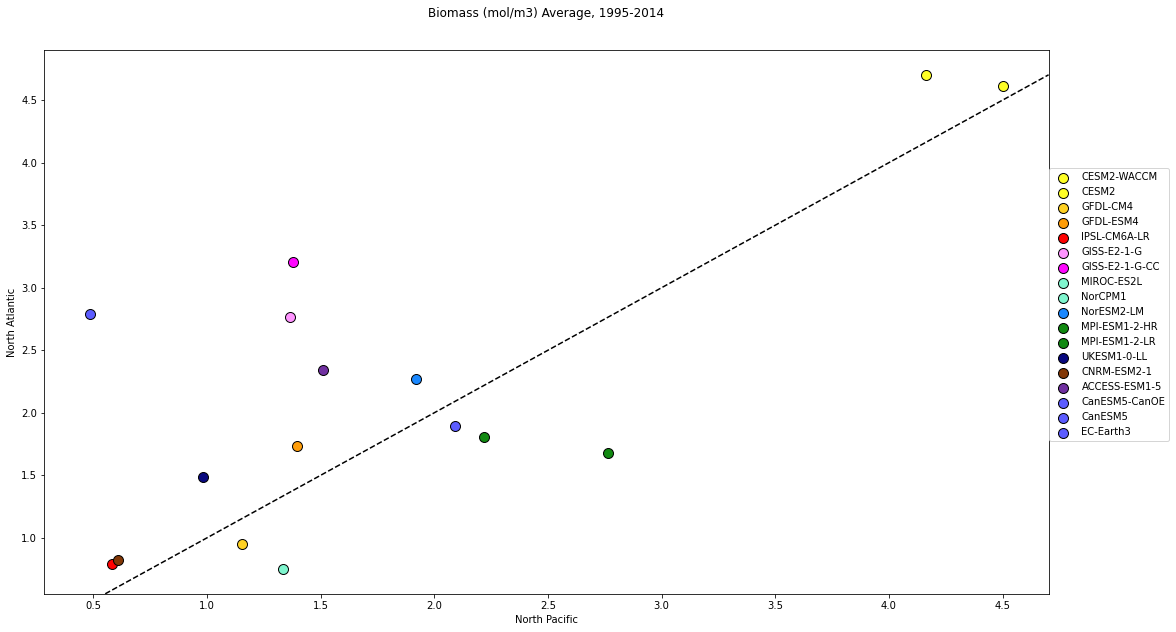

In [10]:
%%time
fig = plt.figure(figsize=(18,10))
colors = [[255, 255, 38], [255, 255, 38], [255,209, 35],
          [255, 157, 9], [255, 2, 2], [255, 148, 255],
          [255, 6, 255], [127, 245, 206], [26, 136, 255],
          [26, 136, 255], [17, 137, 17], [17, 137, 17],
          [8, 8, 126], [130, 55, 6], [112, 48, 160],
          [92, 92, 255], [92, 92, 255], [4, 2, 0]]
newcolors = []
for color in colors:
    newcolors.append([x/255.0 for x in color])
Colors=newcolors

# colors = [[1, 1, 0], [1, 0.8, 0], [1, 0.6, 0], 
#           [1, 0.4, 0], [1, 0, 0], [1, 0.8, 1],
#           [1, 0.5, 1], [1, 0, 1], [0, 0, 0.5],
#           [0, 0, 1], [0, 0.5, 1], [0, 0.5, 0], 
#           [0, 1, 0], [0, 0.6, 0], [0.5, 0.2, 0], [0.2, 0, 0.5]] 
var_names = ['phyc']
plot_titles = ['Iron - Fe (mol/m3) Average, ' + str(start_year) + '-' + str(end_year),'SST (C) Average, ' + str(start_year) + '-' + str(end_year), 
              'Biomass (mol/m3) Average, '+ str(start_year) + '-' + str(end_year), 'Zooplankton (mol/m3) Average, ' + str(start_year) + '-' + str(end_year)]
models = ['CESM2-WACCM','CESM2','GFDL-CM4','GFDL-ESM4','IPSL-CM6A-LR','GISS-E2-1-G','GISS-E2-1-G-CC','MIROC-ES2L',
          'NorCPM1', 'NorESM2-LM','MPI-ESM1-2-HR','MPI-ESM1-2-LR','UKESM1-0-LL','CNRM-ESM2-1','ACCESS-ESM1-5','CanESM5-CanOE','CanESM5', 
          'EC-Earth3']

x1 = []
y1 = []

for var in var_names:
    
    hs = []
    mi = 0
    for model in models:
        print(model)
        ofnp = '/home/jovyan/AtlanticPacificDataComp/' + model + '_' + var + start_year + end_year+ '_np.txt'
        ofna = '/home/jovyan/AtlanticPacificDataComp/' + model + '_' + var + start_year + end_year+ '_na.txt'
        if os.path.exists(ofnp):
            if os.path.exists(ofna):
                np_data = []
                with open(ofnp, "r") as rfnp:
                    for line in rfnp:
                        np_data.append(float(line.strip()))
                
            
                na_data = []
                with open(ofna, "r") as rfna:
                    for line in rfna:
                        na_data.append(float(line.strip()))
            
                d1 = np.array(np_data)
                print(np.mean(d1))
#                 x1.append(((np.max(d1)-np.min(d1)))/np.average(d1))
                ampdifx = (np.max(d1)-np.min(d1))/np.mean(d1)
                x1.append(np.mean(d1))

                d2 = np.array(na_data)
                print(np.mean(d2))
#                 y1.append((np.max(d2)-np.min(d2))/np.average(d2))
                ampdify = (np.max(d2)-np.min(d2))/np.mean(d2)
                y1.append(np.mean(d2))
                
#                 h = plt.scatter(np.mean(d1), np.mean(d2), s=100, marker='o', edgecolor = 'black',
#                             color=Colors[mi], label=str(model))
                
                h = plt.scatter(ampdifx,ampdify, s=100, marker='o', edgecolor = 'black',
                             color=Colors[mi], label=str(model))
                
#     h = plt.scatter(x1,y1,c = Colors, edgecolor = 'black',s = 200)
        mi = mi +1
        hs.append(h)
    
#     plt.xticks([6,8,10,12,14,16,18])
#     plt.yticks([6,8,10,12,14,16,18])
#     plt.xlim(6,18)
#     plt.ylim(6,18)

#     plt.xticks([0,.2e-6,.4e-6,.6e-6,.8e-6,1e-6])
#     plt.yticks([0,.2e-6,.4e-6,.6e-6,.8e-6,1e-6])
#     plt.xlim(0,1e-6)
#     plt.ylim(0,1e-6)
    plt.title(plot_titles[2], fontsize=12, y=1.05)
    plt.xlabel("North Pacific")
    plt.ylabel("North Atlantic")
    plt.xticks()
    fig.legend(hs,models, loc='lower right', bbox_to_anchor=(0.997, 0.33)) 
    plt.axline((1,1),slope = 1, c = 'black', ls = '--')
    plt.savefig('/home/jovyan/Quickplots/Biomass_NP_NA_1995-2014_ampDif.png', dpi=600)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

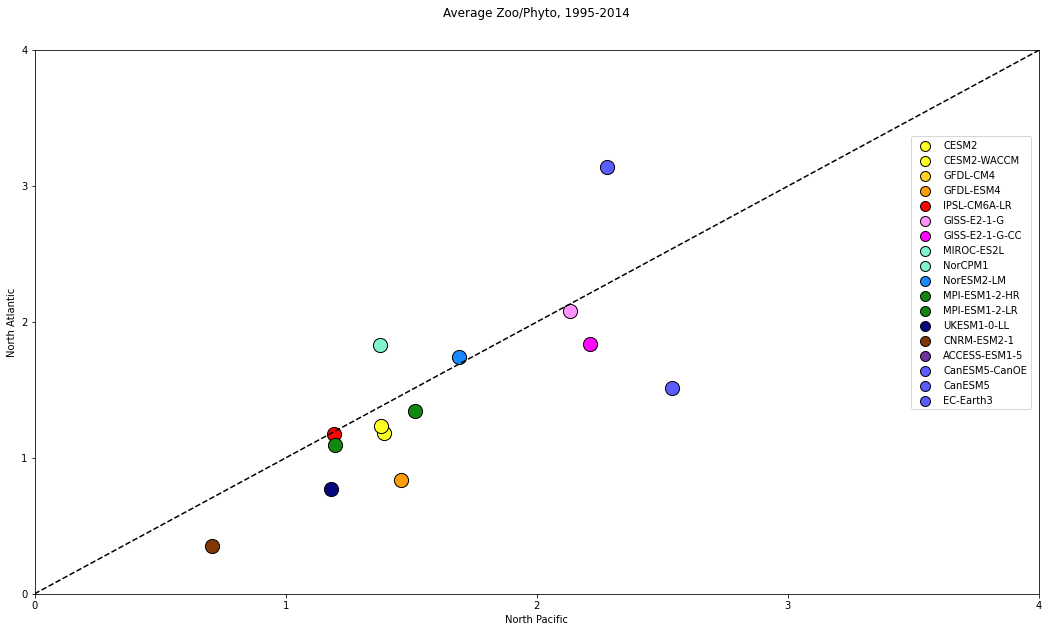

In [43]:
# NEW ZOO/PHYC CALCULATION

plt.figure(figsize=(18, 10))
var_names = ['zooc', 'phyc']
#models = ['CESM2-WACCM','CESM2','GFDL-ESM4','IPSL-CM6A-LR', 
#          'UKESM1-0-LL','CanESM5-CanOE','CanESM5', 
#          'NorESM2-LM','MPI-ESM1-2-HR','MPI-ESM1-2-LR',
#          'CNRM-ESM2-1', 'ACCESS-ESM1-5','MIROC-ES2L']
# models = ['CESM2', 'GFDL-ESM4', 'CESM2-WACCM', 'IPSL-CM6A-LR',
#           'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'UKESM1-0-LL',  'CanESM5', 'NorESM2-LM', 
#           'MIROC-ES2L', 'CNRM-ESM2-1']
models = ['CESM2', 'CESM2-WACCM', 'GFDL-CM4',
         'GFDL-ESM4', 'IPSL-CM6A-LR', 'GISS-E2-1-G',
         'GISS-E2-1-G-CC', 'MIROC-ES2L', 'NorCPM1',
         'NorESM2-LM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR',
         'UKESM1-0-LL', 'CNRM-ESM2-1', 'ACCESS-ESM1-5',
         'CanESM5-CanOE', 'CanESM5', 'EC-Earth3']

plot_titles = ['Average Zoo/Phyto, ' + str(start_year) + '-' + str(end_year)]

colors = [[255, 255, 38], [255, 255, 38], [255,209, 35], 
          [255, 157, 9], [255, 2, 2], [255, 148, 255], 
          [255, 6, 255], [127, 245, 206], [26, 136, 255], 
          [26, 136, 255], [17, 137, 17], [17, 137, 17], 
          [8, 8, 126], [130, 55, 6], [112, 48, 160], 
          [92, 92, 255], [92, 92, 255], [4, 2, 0]]

newcolors = []
for color in colors:
    newcolors.append([x/255.0 for x in color])
colors=newcolors

x1 = []
y1 = []

for model in models:
    i=0
    for var in var_names:
        ofna = '/home/jovyan/AtlanticPacificDataComp/' + model + '_' + var + start_year + end_year+ '_na.txt'
        if os.path.exists(ofna):
            dm=[]
            with open(ofna, "r") as rf:
                for line in rf:
                    dm.append(float(line.strip()))
            if var == 'zooc':
                z = np.array(dm)
                i=i+1
            if var == 'phyc':
                p = np.array(dm)
                i=i+1
    if i == 2:
        s = np.divide(z, p)
        x1.append((np.max(s)-np.min(s))/np.average(s))
    else:
        x1.append(-99999)
for model in models:
    i=0
    for var in var_names:
        ofnp = '/home/jovyan/AtlanticPacificDataComp/' + model + '_' + var + start_year + end_year+ '_np.txt'
        if os.path.exists(ofnp):
            dm=[]
            with open(ofnp, "r") as rf:
                for line in rf:
                    dm.append(float(line.strip()))
            if var == 'zooc':
                z = np.array(dm)
                i=i+1
            if var == 'phyc':
                p = np.array(dm)
                i=i+1
    if i == 2:
        s = np.divide(z, p)
        y1.append((np.max(s)-np.min(s))/np.average(s))
    else:
        y1.append(-99999)

for i in range(18):
    plt.scatter(x1[i], y1[i], c=colors[i], edgecolor='black', s=200)
plt.legend(hs,models, loc='lower right', bbox_to_anchor=(0.997, 0.33))  
# plt.scatter(x, y, c=colors, edgecolor='black', s=200)
plt.xlabel("North Pacific")
plt.ylabel("North Atlantic")
plt.title(plot_titles[0], fontsize=12, y=1.05)
plt.xticks([0,1,2,3,4])
plt.yticks([0,1,2,3,4])
plt.xlim(0,4)
plt.ylim(0,4)
plt.axline((1, 1), slope=1, c='black', ls='--')
plt.savefig('/home/jovyan/Quickplots/PhytoVsZoo_NP_NA_1995-2014_ampDif.png', dpi=600)